In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
airbnb = pd.read_csv("airbnb.csv")

In [90]:
airbnb.shape

(296, 34)

In [91]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 34 columns):
id                                        278 non-null float64
name                                      278 non-null object
space                                     276 non-null object
neighborhood_overview                     180 non-null object
host_id                                   278 non-null float64
host_name                                 278 non-null object
host_since                                278 non-null object
host_response_time                        188 non-null object
host_response_time_minutes_to_response    188 non-null float64
host_response_rate                        188 non-null object
host_neighbourhood                        264 non-null object
host_listings_count                       278 non-null float64
neighbourhood                             251 non-null object
city                                      278 non-null object
state                  

In [92]:
airbnb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,278.0,191776.748201,2.878416e+05,2265.00,13448.500,64999.50,123598.000,899766.00
host_id,278.0,853457.661871,1.404853e+06,2466.00,52364.000,269635.00,492193.250,6629707.00
host_response_time_minutes_to_response,188.0,231.106383,3.770433e+02,1.00,29.750,53.00,286.250,2000.00
host_listings_count,278.0,4.007194,5.101846e+00,1.00,1.000,2.00,4.000,27.00
accommodates,278.0,3.122302,1.788291e+00,1.00,2.000,2.00,4.000,12.00
square_feet,84.0,620.654762,6.372658e+02,0.00,153.750,500.00,815.250,3200.00
availability_365,278.0,204.748201,1.324386e+02,0.00,68.250,243.00,333.500,365.00
occupancy_rate,277.0,148.499097,1.005271e+02,0.00,45.600,160.20,232.050,310.25
number_of_reviews,278.0,75.467626,9.563316e+01,0.00,9.000,38.00,95.000,511.00
review_scores_value,262.0,9.427481,6.727371e-01,6.00,9.000,10.00,10.000,10.00


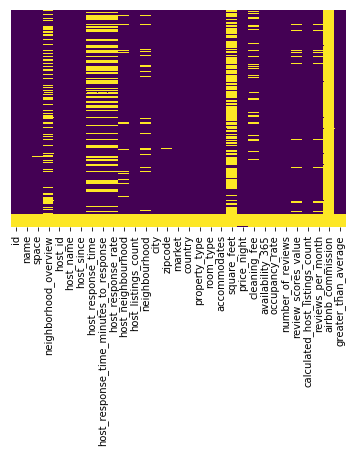

In [61]:
#see where the majority of null values lie, and simplify it because
#you don't need ylabels or the color bar
sns.heatmap(airbnb.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [88]:
#NLP on neighborhood overview, a later section
airbnb_nlp = airbnb.dropna(thresh=2,inplace=True)
airbnb_nlp['neighborhood_overview'].dropna()

TypeError: 'NoneType' object is not subscriptable

In [142]:
airbnb = airbnb.drop(['state', 'year_profit', 'year_revenue', 'airbnb_commission'], axis=1)

In [143]:
#clean the price per night column from string with $ and , to plain float
airbnb['price_night'] = airbnb.price_night.str.replace("$", "")
airbnb['price_night'] = airbnb.price_night.str.replace(",", "")

In [144]:
airbnb['price_night'] = airbnb['price_night'].astype(float)

In [145]:
#remove all columns with qualitative data
airbnb_quant = airbnb

cols_to_remove = []

for col in airbnb_quant.columns:
    try:
        _ = airbnb_quant[col].astype(float) 
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
airbnb_quant = airbnb_quant[[col for col in airbnb_quant.columns if col not in cols_to_remove]]

Couldn't covert name to float
Couldn't covert space to float
Couldn't covert neighborhood_overview to float
Couldn't covert host_name to float
Couldn't covert host_since to float
Couldn't covert host_response_time to float
Couldn't covert host_response_rate to float
Couldn't covert host_neighbourhood to float
Couldn't covert neighbourhood to float
Couldn't covert city to float
Couldn't covert zipcode to float
Couldn't covert market to float
Couldn't covert country to float
Couldn't covert property_type to float
Couldn't covert room_type to float
Couldn't covert cleaning_fee to float


# Does host response time increase if the price per night is higher? No.

I figured if there was more money on the line, the host would be sure to respond as quickly as possible. It appears that the host response time tends to be clumped to the region less than 250 minutes, so under 4 hours or so. Indeed regardless of price, the majority of response times are low.

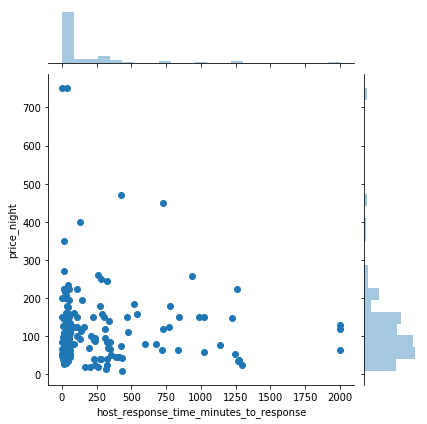

In [100]:
sns.jointplot(airbnb_quant['host_response_time_minutes_to_response'], airbnb_quant['price_night'], data=airbnb_quant);

In [112]:
#come back and format the numbers with bold when you have internet

print("The average response time of airbnb hosts for this dataset is " + (np.mean(airbnb_quant['host_response_time_minutes_to_response'])/60).astype(str) + " hours.")
print("The average price per night for this dataset is " + (np.mean(airbnb_quant['price_night']).astype(str) + " USD."))

The average response time of airbnb hosts for this dataset is 3.85177304964539 hours.
The average price per night for this dataset is 128.0461935483871 USD.


# Correlation Heatmapping

Next I will look at the correlation between different variables. I'll take a look at some variable pairs that will likely be highly correlated, and explore other ones.

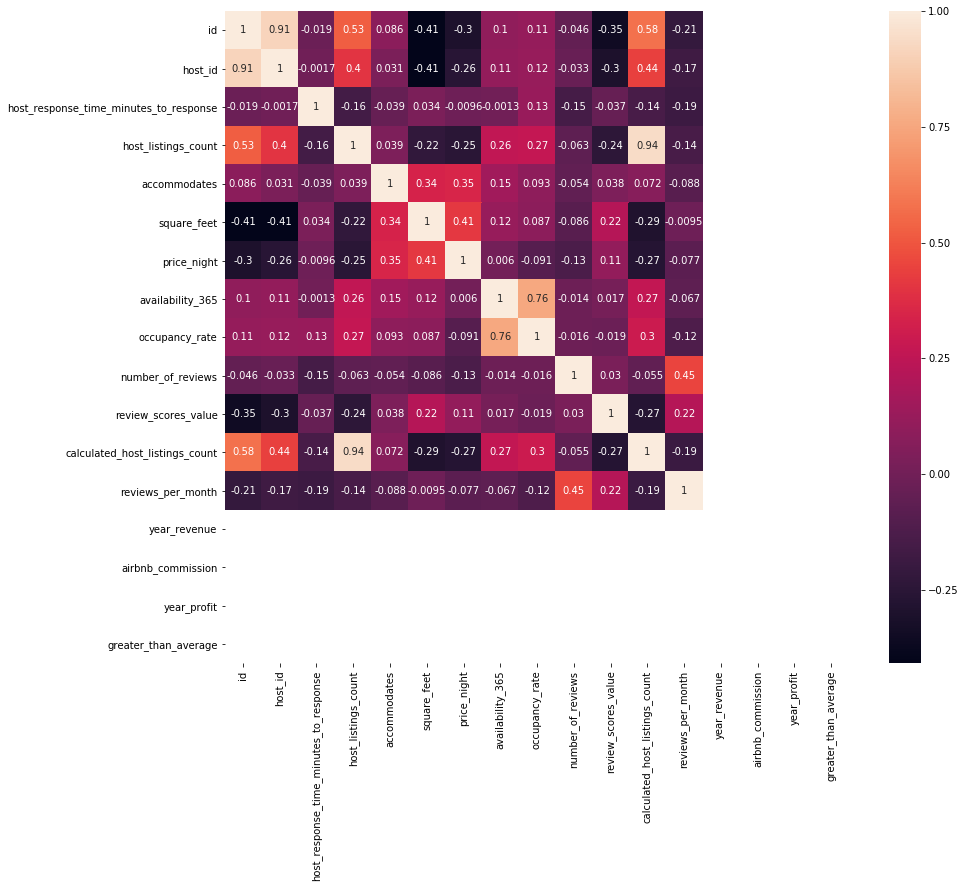

In [121]:
plt.figure(figsize=(14,12))
sns.heatmap(airbnb_quant.corr(), annot=True);

In [137]:
sqft_price_corr = airbnb_quant.corr().loc['square_feet','price_night']

print("The correlation between square feet and price per night is not as high as expected, with r = " + sqft_price_corr.astype(str) + ".")

The correlation between square feet and price per night is not as high as expected, with r = 0.4142892593765483.


I would have thought the correlation would be higher, but price/night is determined in a multivariate way, not solely based on the square footage. More may be revealed through a multivariate linear regression model later.

In [174]:
dist_reviews = airbnb_quant['review_scores_value']

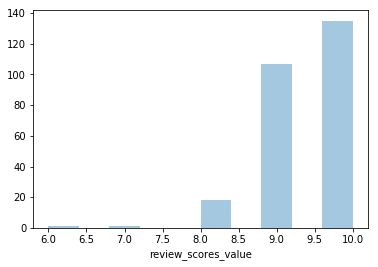

In [188]:
sns.distplot(dist_reviews.dropna(), bins=10, kde=False);

Reviews seem to be heavily biased to the higher ratings. The majority are at least an 8 out of 10! Maybe these data have been doctored to only include the best ratings!

In [13]:
#ix is row and column slicing, up to row 10, and from column 4 to the second to last column
truncated_airbnb = airbnb_quant.ix[:10,4:-1]
truncated_airbnb = truncated_airbnb.dropna(axis=1)
truncated_airbnb.shape

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(11, 8)

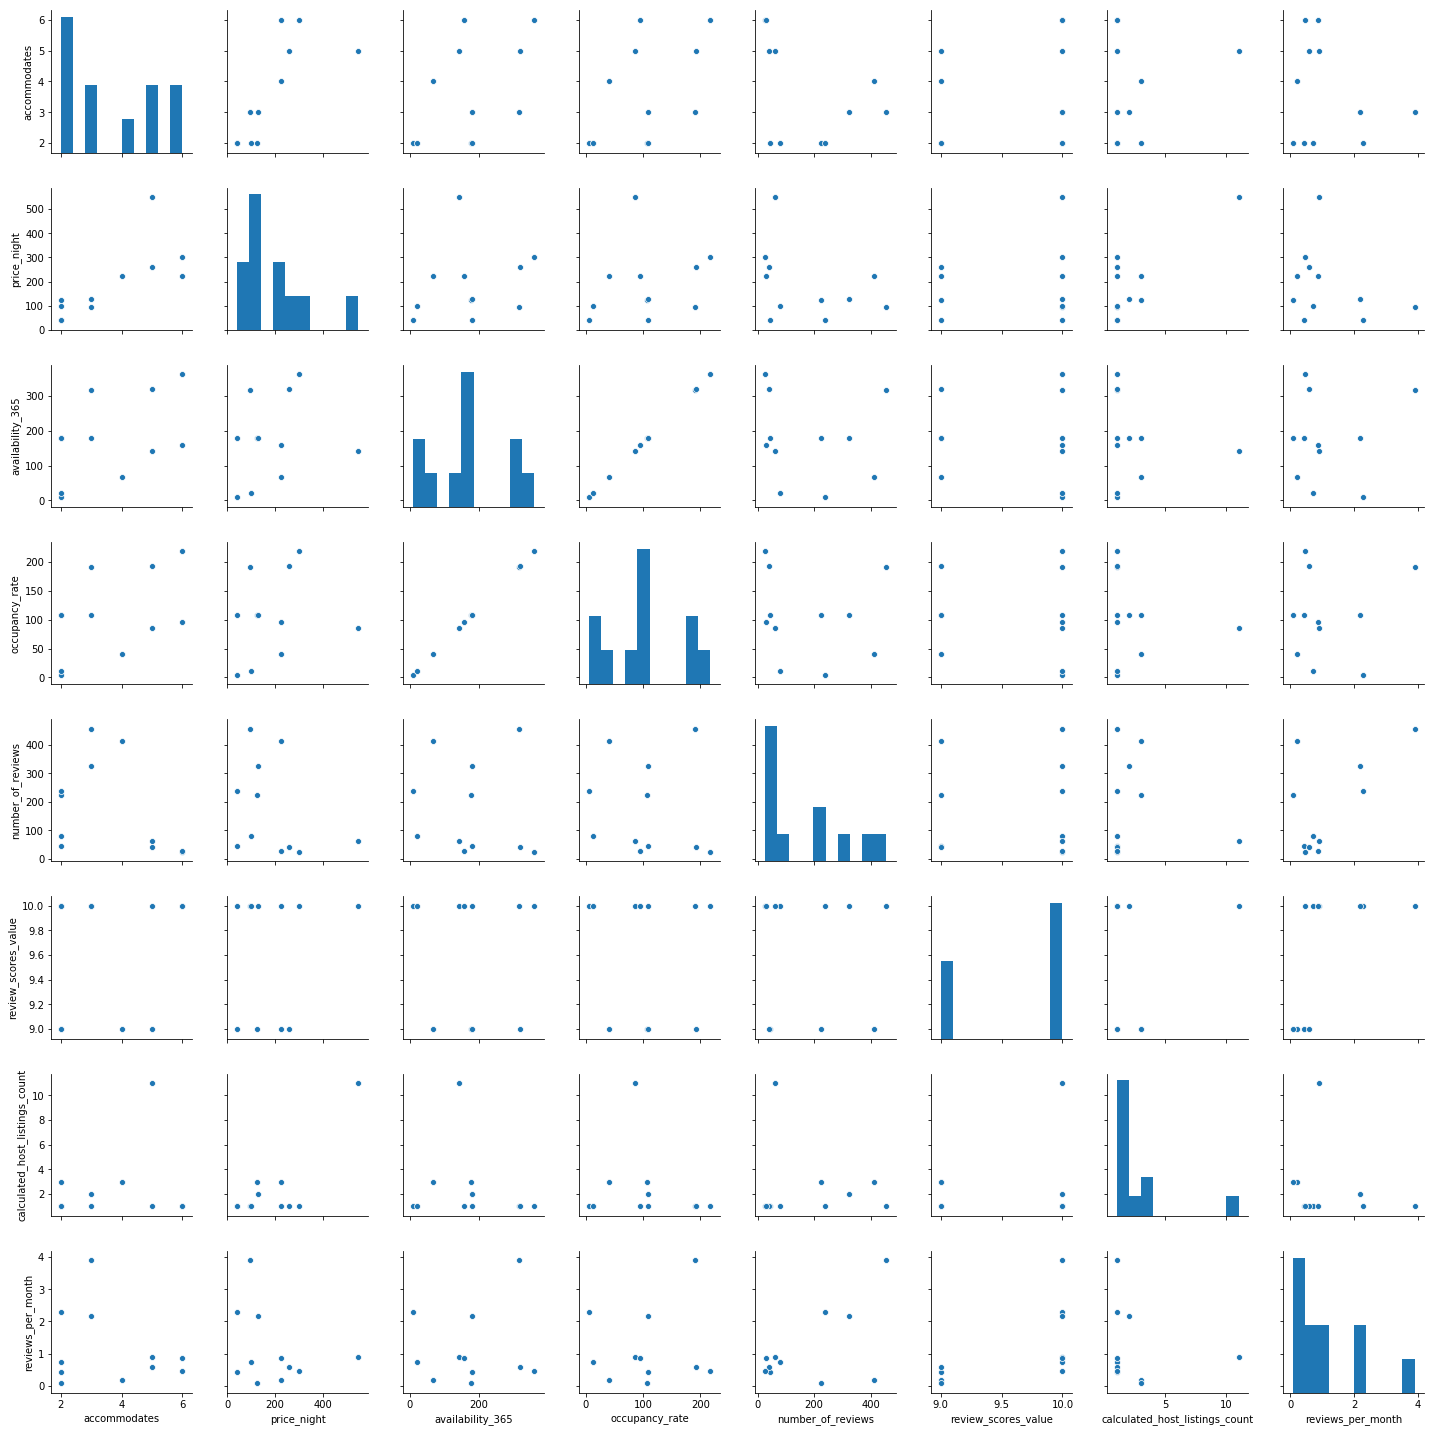

In [208]:
#simplify the pairplot
sns.pairplot(truncated_airbnb)

In [22]:
airbnb.columns

Index(['id', 'name', 'space', 'neighborhood_overview', 'host_id', 'host_name',
       'host_since', 'host_response_time',
       'host_response_time_minutes_to_response', 'host_response_rate',
       'host_neighbourhood', 'host_listings_count', 'neighbourhood', 'city',
       'state', 'zipcode', 'market', 'country', 'property_type', 'room_type',
       'accommodates', 'square_feet', 'price_night', 'cleaning_fee',
       'availability_365', 'occupancy_rate', 'number_of_reviews',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'year_revenue', 'airbnb_commission', 'year_profit',
       'greater_than_average'],
      dtype='object')

# Aggregation

Beginning to look at ways to aggregate the data, I saw by calling nunique on the countries column, that there are 3 countries: the United States, the Netherlands, and Taiwan, in this dataframe.

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


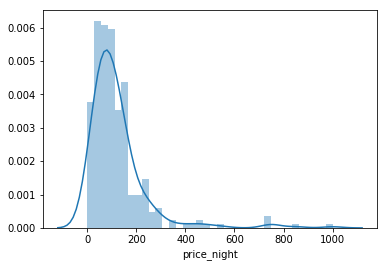

In [98]:
sns.distplot(airbnb_quant['price_night'].interpolate(method='linear'));

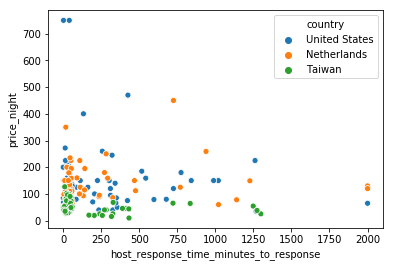

In [29]:
sns.scatterplot(airbnb_quant['host_response_time_minutes_to_response'], airbnb_quant['price_night'], hue=airbnb['country'], data=airbnb_quant);

The highest priced units are in the US, both the US and the Netherlands tend to be higher priced than units in Taiwan, and thus Taiwan contains the cheapest units in price/night.

In [133]:
airbnb['price_night'].isnull().count()

TypeError: count() takes exactly one argument (0 given)

In [129]:
airbnb['city'].nunique()

24

# Aggregating by City

I will group by city since there are 24 represented here and get the mean price/night, square footage, and other interesting metrics. I also wanted to look at the count to make sure there isn't too much bias. As expected however, there is an over-representation of US cities, followed by Dutch cities respectively.

In [183]:
grouped_by_city = airbnb[['price_night', 'city']].groupby(['city']).agg(['mean', 'count'])

In [184]:
grouped_by_city

price_night      
                           mean count
city                                 
Amsterdam            151.735294    68
Austin               180.144928    69
Beitou District       42.880000     3
Brooklyn             143.264706    34
Daan District         59.521778    18
De Pijp              150.000000     1
Jhongjheng District   45.493333     3
Jhongshan District    41.920000     1
Nangang District       9.760000     1
Neihu District        52.632000     8
New York             119.294118    34
Queens                99.000000     2
Shilin District       60.432000     2
Sinyi District        48.736000     1
Songshan District     51.008000     3
Taipei                68.224000     1
Wanhua District       80.422400     5
Wenshan District      41.920000     1
Xinyi District        96.512000     1
ZhongZheng District   10.720000     1
Zhongshan District    64.334222     9
Zhongshan district    43.872000     1
Zhongzheng District   24.476800    10
Â§ßÂÆâÂçÄ             82.848000     1

In [128]:
grouped_by_city.ix[0:,0]

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


city
Amsterdam               473.583333
Austin                 1043.960000
Beitou District           0.000000
Brooklyn               1001.666667
Daan District           240.000000
De Pijp                        NaN
Jhongjheng District            NaN
Jhongshan District             NaN
Nangang District               NaN
Neihu District          167.833333
New York                680.200000
Queens                         NaN
Shilin District         290.000000
Sinyi District          675.000000
Songshan District              NaN
Taipei                         NaN
Wanhua District           0.000000
Wenshan District               NaN
Xinyi District                 NaN
ZhongZheng District            NaN
Zhongshan District      550.500000
Zhongshan district      320.000000
Zhongzheng District     302.000000
Â§ßÂÆâÂçÄ                      NaN
Name: (square_feet, mean), dtype: float64

# Pricing and Coefficients - Linear Regression

In [148]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [146]:
#interpolate to remove missing values, method=linear
airbnb_quant = airbnb_quant.interpolate()

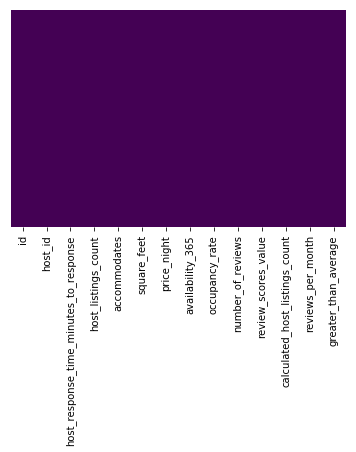

In [150]:
#check and make sure there are no NaNs. It looks like there are three square_feet values that are still NaN. Let's remove those.
sns.heatmap(airbnb_quant.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [149]:
airbnb_quant = airbnb_quant.dropna()

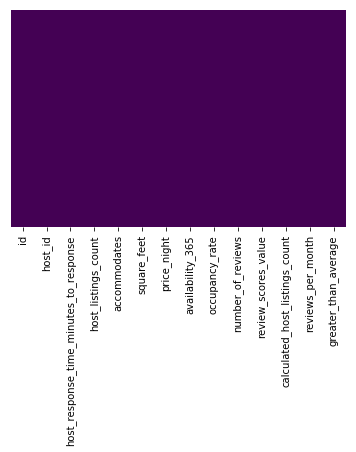

In [151]:
#It's a thing of beauty.
sns.heatmap(airbnb_quant.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [152]:
#defining X and y column(s) for linear regression. Going to look at price_night as my dependent variable.
airbnb_quant.columns

Index(['id', 'host_id', 'host_response_time_minutes_to_response',
       'host_listings_count', 'accommodates', 'square_feet', 'price_night',
       'availability_365', 'occupancy_rate', 'number_of_reviews',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'greater_than_average'],
      dtype='object')

In [154]:
X_columns = airbnb_quant[['host_response_time_minutes_to_response',
       'host_listings_count', 'accommodates', 'square_feet',
       'availability_365', 'occupancy_rate', 'number_of_reviews',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'greater_than_average']]

y_column = airbnb_quant['price_night']

In [155]:
def linear_regression(df, x_columns, y_column):
    '''Takes a dataframe, the x variables (columns of the 
    dataframe) to be trained on as an array and the 
    y column to use in predictions and testing variable 
    and returns the coefficients for each x variable 
    on y (the dependent variable).
    
    Requires a dataframe with only quantitative values, 
    no strings.
    
    Example of the required data cleaning and then function call:
    df = pd.read_csv("loan_data.csv")
    df = df.drop(['string columns'], axis=1)
    x_columns = df['x_a', 'x_b', ...'x_n']
    y_column = df['y_variable']
    
    linear_regression(df, x_columns, y_column)
    
    
                Coeff
    credit.policy	 11.359122
    inq.last.6mths	 0.236195
    installment	     0.040879
    days.with.cr.li  0.002172
    revol.bal	     0.000043
    dti	-0.224324
    log.annual.inc	-0.238352
    revol.util	-0.361837
    not.fully.paid	-2.132126
    delinq.2yrs	-9.282614
    pub.rec	-10.164147
    int.rate	-786.193923
    '''
    X = x_columns
    y = y_column
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    from sklearn.linear_model import LinearRegression
    
    lm = LinearRegression()
    
    lm.fit(X_train, y_train)
    
    cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
    
    return cdf.sort_values('Coeff', ascending=False)

In [156]:
linear_regression(airbnb_quant, X_columns, y_column)

,Coeff
accommodates,19.244010
reviews_per_month,4.694659
host_listings_count,0.137096
square_feet,0.071461
host_response_time_minutes_to_response,0.012460
greater_than_average,0.000000
availability_365,-0.019512
number_of_reviews,-0.222706
occupancy_rate,-0.265814
review_scores_value,-2.141876


In [157]:
X = X_columns
y = y_column

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            price_night   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     9.883
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           3.53e-14
Time:                        15:01:45   Log-Likelihood:                -1782.5
No. Observations:                 292   AIC:                             3587.
Df Residuals:                     281   BIC:                             3627.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equ

# Interpretation

The above table of statistics shows that the only statistically significant X variables are: accommodates, square_feet, occupancy_rate, and number_of_reviews.

As such, I'm going to re-run the linear regression model with just thtese as the X columns

In [158]:
X_columns = airbnb_quant[['accommodates', 
                          'square_feet', 
                          'occupancy_rate', 
                          'number_of_reviews']]

y_column = airbnb_quant['price_night']

In [159]:
linear_regression(airbnb_quant, X_columns, y_column)

,Coeff
accommodates,14.300599
square_feet,0.070438
number_of_reviews,-0.132083
occupancy_rate,-0.180857


As we can see above, the number of people the space accommodates provides the largest impact on price_night. For each additional person a space accommodates, there is a $14.30 increase in price_night. Square feet impacts it significantly less. There is a negative effect on price based on number_of_reviews and occupancy_rate interestingly.

# Visualization via Maps

In [207]:
airbnb_us = airbnb[airbnb['country'] == 'United States']

In [208]:
airbnb_us[['price_night', 'city']].groupby(['city']).agg(['mean'])

,price_night
,mean
city,
Austin,180.144928
Brooklyn,143.264706
New York,119.294118
Queens,99.000000


In [213]:
austin_avg = np.mean(airbnb_us['price_night'].where(airbnb_us['city'] == 'Austin'))
brooklyn_avg = np.mean(airbnb_us['price_night'].where(airbnb_us['city'] == 'Brooklyn'))
queens_avg = np.mean(airbnb_us['price_night'].where(airbnb_us['city'] == 'Queens'))
ny_avg = np.mean(airbnb_us['price_night'].where(airbnb_us['city'] == 'New York'))

avg_prices = [austin_avg, brooklyn_avg, queens_avg, ny_avg]

In [214]:
#define the latitudes and longitudes of the cities for the mapping capability

lats = [30.267153, 40.678177 , 40.712776, 40.728226]
lons = [-97.743057, -73.944160 , 74.005974, -73.794853]

In [215]:
Cities = ['Austin', 'Brooklyn', 'New York', 'Queens']

In [220]:
map_data = {'City': Cities, 
            'avg_unit_price': avg_prices,
            'Latitude': lats,
            'Longitude': lons}


map_data = pd.DataFrame(map_data)
map_data

,City,avg_unit_price,Latitude,Longitude
0,Austin,180.144928,30.267153,-97.743057
1,Brooklyn,143.264706,40.678177,-73.944160
2,New York,99.000000,40.712776,74.005974
3,Queens,119.294118,40.728226,-73.794853


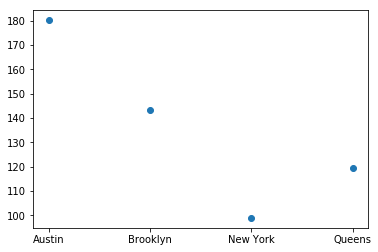

In [224]:
#quick visualization. Austin is actually the most expensive average unit. 
#It also has 68 observations, double the number for New York, the next most represented city in the dataset.
#Lets look at the distribution of the price by each of these cities next to see which has the highest value outliers.
plt.scatter(map_data['City'], map_data['avg_unit_price'])

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


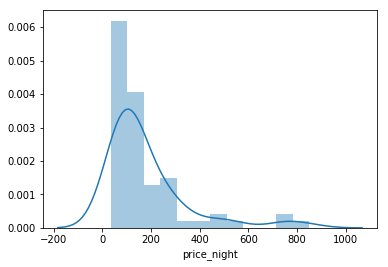

In [227]:
sns.distplot(airbnb_us[airbnb_us['city'] == 'Austin']['price_night'])

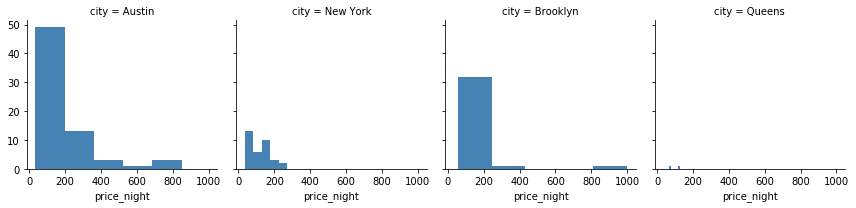

In [235]:
#Let's facet by city and see the distributions of prices.
g = sns.FacetGrid(airbnb_us, col='city', margin_titles=False)
g.map(plt.hist, "price_night", color="steelblue", bins=5)

As I suspected, there is an issue. New York has no high priced units (as in between 800 and 1000 USD/night). Austin is skewed right with a long tail reaching into the $800 range and Brooklyn has some units that are high priced as well. As you can see in the below prices, Queens only has two instances, one very low and one moderately high. This impacted its average significantly.

In [237]:
#Queens looks weird so I just want to take a look.
airbnb_us[airbnb_us['city'] == 'Queens']['price_night']

124    130.0
128     68.0
Name: price_night, dtype: float64

In [238]:
airbnb_us[airbnb_us['city'] == 'New York']['price_night'].describe()

count     34.000000
mean     119.294118
std       57.057403
min       35.000000
25%       76.000000
50%      123.000000
75%      150.000000
max      272.000000
Name: price_night, dtype: float64

The reason New York was lower on the scatterplot in terms of price is shown above. 50% of the data lies just above the mean price for Queens, and the mean is below of course...